In [5]:
import cmath
import math

s = -0.05
w = 10.0
a = 2.0
h = 1.9

i = -a/2 * (cmath.exp(1j * h) / (s + 2j * w) + cmath.exp(-1j * h) / s)
real = i.real
imag = i.imag
print(f"Real part: {real:.6f}")
print(f"Imaginary part: {imag:.6f}")

Real part: -6.513146
Imaginary part: -18.942048


In [6]:
a_est = abs(s) / w**2 * math.sqrt(w**2 * (2 * w * real + s * imag) ** 2 + (s * w * real + imag * (s ** 2 + 2 * w ** 2)) ** 2)
print(f"Estimated a: {a_est:.6f}")

Estimated a: 2.000000


In [7]:
r = s / w
a_est2 = abs(s) * math.sqrt((2 * real + imag * r) ** 2 + (real * r + imag * (r ** 2 + 2)) ** 2)
print(f"Estimated a (method 2): {a_est2:.6f}")

Estimated a (method 2): 2.000000


In [6]:
# 符号の変換

code = """
昭和60年
1
0
1
0
1
昭和61年
0
1
1
0
1
昭和62年
1
1
1
0
1
昭和63年
0
0
0
1
1
昭和64年
1
0
0
1
1
昭和65年
0
1
0
1
1
昭和66年
1
0
0
0
1
昭和67年
0
1
0
0
1
昭和68年
1
1
0
0
1
昭和69年
0
0
1
0
1"""
lines = []
for line in code.strip().split('\n'):
    if line not in ('0', '1'):
        lines.append([line, ""])
    else:
        lines[-1][-1] += line
print(lines)

# for v, k in lines: 
#     print(f"\"{k}\": \"{v}\",")
for _, k in lines:
    print(f"\"{k}\",")

[['昭和60年', '10101'], ['昭和61年', '01101'], ['昭和62年', '11101'], ['昭和63年', '00011'], ['昭和64年', '10011'], ['昭和65年', '01011'], ['昭和66年', '10001'], ['昭和67年', '01001'], ['昭和68年', '11001'], ['昭和69年', '00101']]
"10101",
"01101",
"11101",
"00011",
"10011",
"01011",
"10001",
"01001",
"11001",
"00101",


In [47]:
data = []
with open("signal_data.txt", "r") as f:
    for line in f:
        line_data = list(map(int, line.strip().split(" ")[1:]))
        data.append(line_data[:min(len(line_data), 1)])

In [49]:
first_idx = 0
run_length = [0] * 2
for idx, i in enumerate(data):
    for j in range(2):
        if j in i:
            run_length[j] += 1
        else:
            run_length[j] = 0
    if max(run_length) >= 3:
        first_idx = idx - max(run_length) + 1
        break

print(first_idx)

11245


In [51]:
chunks = []
idx = first_idx
chunk_size = 15
while True:
    chunk = data[idx:idx + chunk_size]
    non_empty_count = sum(1 for i in chunk if i)
    if non_empty_count < 2:
        break
    chunks.append(chunk)
    idx += chunk_size

chunks.pop() # drop the last
print(len(chunks))

for i in range(10):
    print(chunks[i])
print("...")
for i in range(len(chunks) - 10, len(chunks)):
    print(chunks[i])

962
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [], [], [1]]
[[1], [], [], [], [], [0], [], [0], [0], [0], [0], [0], [0], [0], [0]]
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [], [], [1]]
[[1], [], [], [], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]
...
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1]]
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [], [], [], [], [0], [0]]
[[0], [0], [0], [0],

In [52]:
def flatten(lst):
    result = []
    for i in lst:
        result.extend(i)
    return result

chunk_counts = []
for chunk in chunks:
    flat_chunk = flatten(chunk)
    chunk_counts.append([flat_chunk.count(i) for i in range(2)])

for i in range(20):
    print(f"Chunk {i + 1}: {chunk_counts[i]}")

Chunk 1: [0, 15]
Chunk 2: [0, 13]
Chunk 3: [9, 1]
Chunk 4: [15, 0]
Chunk 5: [0, 15]
Chunk 6: [0, 15]
Chunk 7: [0, 15]
Chunk 8: [0, 13]
Chunk 9: [11, 1]
Chunk 10: [15, 0]
Chunk 11: [15, 0]
Chunk 12: [1, 14]
Chunk 13: [2, 12]
Chunk 14: [15, 0]
Chunk 15: [14, 1]
Chunk 16: [1, 11]
Chunk 17: [15, 0]
Chunk 18: [15, 0]
Chunk 19: [2, 10]
Chunk 20: [14, 1]


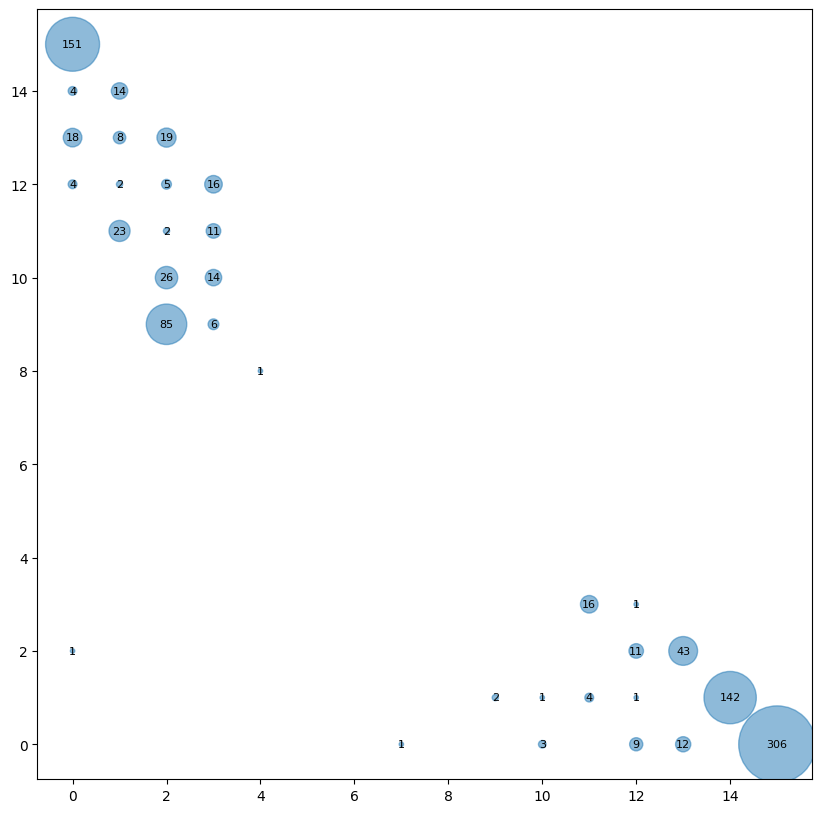

In [53]:
import matplotlib.pyplot as plt

# count の分布をプロット

pair_count = {}
for pair in chunk_counts:
    key = tuple(pair)
    if key not in pair_count:
        pair_count[key] = 0
    pair_count[key] += 1

plt.figure(figsize=(10, 10))
# scatterで多い点ほど大きく
plt.scatter(
    [k[0] for k in pair_count.keys()],
    [k[1] for k in pair_count.keys()],
    s=[v * 10 for v in pair_count.values()],
    alpha=0.5
)
for k, v in pair_count.items():
    plt.text(k[0], k[1], str(v), fontsize=8, ha='center', va='center')


In [54]:
def print_surrounding(idx):
    print(f"{idx + 1}")
    for j in range(-2, 3):
        k = idx + j
        if 0 <= k < len(chunks):
            print(f"Chunk {k + 1}: {str(chunk_counts[k]):<8} {chunks[k]}")
    

errors = 0
for idx, count in enumerate(chunk_counts):
    if max(count) < 5 or min(count) * 1.5 >= max(count):
        print_surrounding(idx)
        print("-----")
        errors += 1
print(f"Total errors: {errors}")


216
Chunk 214: [12, 3]  [[1], [1], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0]]
Chunk 215: [7, 0]   [[0], [0], [0], [0], [0], [0], [0], [], [], [], [], [], [], [], []]
Chunk 216: [0, 2]   [[], [], [], [], [], [], [], [1], [1], [], [], [], [], [], []]
Chunk 217: [12, 0]  [[], [], [0], [], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]
Chunk 218: [13, 2]  [[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1]]
-----
Total errors: 1


In [57]:
from ews_decoder import EWSDecoder
decoder = EWSDecoder().decode()
decoder.__next__()

for count in chunk_counts:
    bit = str(count.index(max(count)))
    print(bit, end="")
    res = decoder.send(bit)
    if res is not None:
        print("", res)

1100 第1/2種開始信号
1111000110010010 第2種開始信号
10 
001101001101 地域共通
00 
1111000110010010 第2種開始信号
010 
00001 16日
0 今日
10001 1月
00 
111

ValueError: Unexpected year_time_code_head: 111